

# APRENDIZAJE POR REFUERZO

## Introducción

Las competencias asociadas a este *notebook* son:

- Diseñar un marco experimental teniendo en cuenta los métodos más adecuados para la captura, procesamiento, almacenamiento, análisis y visualización de datos.
- Utilizar de forma combinada los fundamentos matemáticos, estadísticos y de programación para desarrollar soluciones a problemas en el ámbito de la ciencia de los datos.

Y los objetivos que perseguimos con este *notebook* son:

- Conocer los principales métodos de aprendizaje automático en problemas de aprendizaje por refuerzo (del inglés, *Reinforcement Learning*, RL), y saber aplicar el tipo de algoritmo adecuado en cada situación, así como sus puntos fuertes y debilidades.
- Identificar los distintos elementos que aparecen en un proyecto de aprendizaje por refuerzo.
- Familiarización con librerías de programación de redes neuronales a través de ejemplos.
- Saber desarrollar una solución para un problema haciendo uso de métodos de aprendizaje por refuerzo

## Descripción


El problema al que nos enfrentamos en esta PEC es el denominado [*Frozen Lake*](https://gymnasium.farama.org/environments/toy_text/frozen_lake/).

Este entorno es un lago helado y el objetivo es cruzarlo sin caer en los agujeros. Los estados describen la posición del agente en el lago y las acciones guían sus movimientos en su travesía por el lago, recibiendo recompensa únicamente si alcanza la casilla objetivo. Sin embargo, un episodip podrá terminar, además de alcanzando el objetivo, si el agente cae en uno de los agujeros o si se alcanza un duración determinada. Revisa con atención el enlace proporcionada para familiarizarte con los detalles del entorno.



## PASO 1

Utilizaremos la API para trabajar con entornos y agentes de aprendizaje reforzado ***gym***, mantenida actualmente por el proyecto ***Gymnasium***.

https://gymnasium.farama.org/


In [1]:
%pip install gymnasium

Note: you may need to restart the kernel to use updated packages.


In [2]:
%pip install pygame --upgrade

Note: you may need to restart the kernel to use updated packages.


Crear el entorno

In [2]:
import gymnasium as gym

env = gym.make("FrozenLake-v1", 
               render_mode="rgb_array", 
               map_name="4x4", 
               is_slippery=False)
env.reset()

(0, {'prob': 1})

<span style="color:darkblue">

**gym** proporciona entornos de pruebas estandarizados para algoritmos de aprendizaje por refuerzo.


* **"FrozenLake-v1":** FrozenLake es un juego estándar en gym donde el agente debe moverse sobre un lago congelado (con cuadros seguros y peligrosos) para llegar a un objetivo.

* **render_mode="rgb_array":** Define cómo se visualizará el entorno. rgb_array significa que el entorno se mostrará como un array de píxeles RGB (colores) para la visualización y el procesamiento de imágenes.

* **map_name="4x4":** Especifica el tamaño del mapa del juego FrozenLake. En este caso, se está utilizando un mapa de 4x4 cuadrados.

* **is_slippery=False:** Determina las propiedades del lago congelado. Cuando is_slippery es False, significa que no hay deslizamiento en el lago; es decir, los movimientos del agente son más predecibles y no hay desviación aleatoria.


https://gymnasium.farama.org/api/env/#gymnasium.Env.render

Visualizar el número de estados del entorno, el número de acciones posibles y el rango de valores de las recompensas.

In [3]:
obs_space   = env.observation_space.n
num_actions = env.action_space.n
rwd_range   = env.reward_range

print('obs_space:', obs_space)
print('#actions:', num_actions)
print('rwd_range:', rwd_range)

obs_space: 16
#actions: 4
rwd_range: (0, 1)


Utilizad de los ***wrappers*** de ***gym***:

https://gymnasium.farama.org/api/wrappers/

Utiliza el ***wrapper RecordVideo*** sobre el entorno (***env***) configurándolo para que guarde vídeos de todos los episodios del entrenamiento.

https://gymnasium.farama.org/api/wrappers/misc_wrappers/#gymnasium.wrappers.RecordVideo

In [4]:
from gymnasium.wrappers import RecordVideo

# Crear un wrapper para grabar videos
env = RecordVideo(env, video_folder="videos", episode_trigger=lambda x: True)

/Users/alex/anaconda3/envs/env_ML/lib/python3.10/site-packages/gymnasium/wrappers/record_video.py:87: UserWarning: WARN: Overwriting existing videos at /Users/alex/Library/CloudStorage/GoogleDrive-arodriguezjus@uoc.edu/My Drive/1 UOC/02_SEMESTRE/01_Aprenentatge automàtic/RETO6/PEC/videos folder (try specifying a different `video_folder` for the `RecordVideo` wrapper if this is not desired)
  logger.warn(


<span style="color:darkblue">

Los wrappers en gymnasium (o gym) son herramientas útiles que permiten modificar o extender la funcionalidad de los entornos de aprendizaje por refuerzo. Estos wrappers pueden alterar aspectos del entorno, como la representación del estado, las recompensas, o incluso la forma en que se recopilan y visualizan los datos. 

En el contexto de **gym** , un wrapper se puede utilizar para añadir capas de funcionalidad adicionales alrededor del entorno base. Por ejemplo, se pueden utilizar para normalizar observaciones o recompensas, filtrar acciones, o cambiar la forma en que se presentan los datos del entorno para su análisis o visualización.


Para crear un Wrapper para Grabar Vídeos, se envuelve el entorno existente env con RecordVideo. Los parámetros de este wrapper son:
* **env**: Es el entorno original que se está envolviendo.
* **video_folder="videos"**: Define la carpeta donde se guardarán los vídeos grabados. Aquí se está especificando una carpeta llamada "videos".
* **episode_trigger=lambda x**: True: Es una función que determina cuándo se debe grabar un video. En este caso, lambda x: True significa que se grabará un vídeo en cada episodio, ya que la función siempre devuelve True.

Este wrapper es muy útil para la evaluación y el análisis del rendimiento y el comportamiento del agente en distintos puntos del proceso de entrenamiento.

Entrena el agente durante un episodio y con un máximo de 50 iteraciones (steps) en el que el agente siempre debe moverse (acción) hacia abajo.

Después, utiliza la función ***moviepy.editor.ipython_display*** para visualizar el vídeo del entrenamiento y comenta los resultados.

In [5]:
from moviepy.editor import VideoFileClip


# Entrenar el agente durante un episodio y un máximo de 50 iteraciones
for step in range(50):
    observation, reward, done, extra, info = env.step(1) # 1 representa moverse hacia abajo
    if done:
        break

env.close()

# Cargar y mostrar el video
video_path = "videos/rl-video-episode-0.mp4"  
video_clip = VideoFileClip(video_path)
video_clip.ipython_display()


Moviepy - Building video /Users/alex/Library/CloudStorage/GoogleDrive-arodriguezjus@uoc.edu/My Drive/1 UOC/02_SEMESTRE/01_Aprenentatge automàtic/RETO6/PEC/videos/rl-video-episode-0.mp4.
Moviepy - Writing video /Users/alex/Library/CloudStorage/GoogleDrive-arodriguezjus@uoc.edu/My Drive/1 UOC/02_SEMESTRE/01_Aprenentatge automàtic/RETO6/PEC/videos/rl-video-episode-0.mp4



Moviepy - Done !
Moviepy - video ready /Users/alex/Library/CloudStorage/GoogleDrive-arodriguezjus@uoc.edu/My Drive/1 UOC/02_SEMESTRE/01_Aprenentatge automàtic/RETO6/PEC/videos/rl-video-episode-0.mp4
Moviepy - Building video __temp__.mp4.
Moviepy - Writing video __temp__.mp4



Moviepy - Done !
Moviepy - video ready __temp__.mp4


<span style="color:darkblue">

El código proporcionado detalla cómo entrenar un agente en el entorno de 'FrozenLake' para que se mueva hacia abajo en cada paso, con un límite de 50 iteraciones. La acción de moverse hacia abajo se representa con el número 1 en la función `env.step(1)`. Si el agente alcanza un estado terminal (done se vuelve True), ya sea por llegar al objetivo o por caer en un agujero, el episodio terminará y el bucle se romperá.

Después de ejecutar el entrenamiento, se cierra el entorno con `env.close()` y se usa la biblioteca `moviepy` para cargar y visualizar el vídeo del episodio de entrenamiento grabado.

En el video podemos ver como el agente avanza hacia abajo hasta caer en el agujero.

De nuevo, entrena el agente durante un único episodio y con un máximo de 50 iteraciones (steps). Si embargo, en este caso el agente siempre realizará un movimiento aleatorio (acción).

Después, utiliza la función ***moviepy.editor.ipython_display*** para visualizar el vídeo del entrenamiento y comenta los resultados.

In [6]:
import random

# Reiniciar el entorno para el nuevo episodio
env.reset()

# Entrenar el agente durante un episodio y un máximo de 50 iteraciones
for step in range(50):
    action = env.action_space.sample()  # Acción aleatoria
    observation, reward, done, extra, info = env.step(action)
    if done:
        break

env.close()


video_path = "videos/rl-video-episode-1.mp4" 
video_clip = VideoFileClip(video_path)
video_clip.ipython_display()


Moviepy - Building video /Users/alex/Library/CloudStorage/GoogleDrive-arodriguezjus@uoc.edu/My Drive/1 UOC/02_SEMESTRE/01_Aprenentatge automàtic/RETO6/PEC/videos/rl-video-episode-1.mp4.
Moviepy - Writing video /Users/alex/Library/CloudStorage/GoogleDrive-arodriguezjus@uoc.edu/My Drive/1 UOC/02_SEMESTRE/01_Aprenentatge automàtic/RETO6/PEC/videos/rl-video-episode-1.mp4



Moviepy - Done !
Moviepy - video ready /Users/alex/Library/CloudStorage/GoogleDrive-arodriguezjus@uoc.edu/My Drive/1 UOC/02_SEMESTRE/01_Aprenentatge automàtic/RETO6/PEC/videos/rl-video-episode-1.mp4
Moviepy - Building video __temp__.mp4.
Moviepy - Writing video __temp__.mp4



Moviepy - Done !
Moviepy - video ready __temp__.mp4


<span style="color:darkblue">

El código proporcionado detalla un segundo entrenamiento del agente, pero esta vez utilizando una estrategia completamente aleatoria para elegir las acciones. La función `env.action_space.sample()` se utiliza para seleccionar una acción de manera aleatoria dentro del espacio de acciones posibles del entorno. 

En el video vemos como el agente se va moviendo por casillas de forma aleatorio hasta que se cae por otro agujero.

## PASO 2

Ahora que ya nos hemos familiarizado con el entorno y su funcionamiento, implementaremos Aprendizaje-Q para entrenar el agente.

Se completa la celda siguiente para implementar la función ***create_q_table*** que, dado el entorno, debe generar la tabla Q con las dimensiones que corresponda e inicializar sus valores con ceros.

In [7]:
import numpy as np

def create_q_table(env):
    # Inicializar la tabla Q con ceros
    # El número de filas es igual al número de estados
    # El número de columnas es igual al número de acciones posibles
    q_table = np.zeros([env.observation_space.n, env.action_space.n])
    return q_table


Completa la función ***get_action*** que, dado el estado, el entorno, la tabla Q y el valor de $\epsilon$ (***epsilon***), debe implementar una política $\epsilon$-*greedy* y retornar la acción correspondiente.

Recuerda que la política $\epsilon$-*greedy* debe retornar una acción aleatoria u óptima (basada en la tabla Q) según el valor de $\epsilon$.

In [8]:
import random

def get_action(state, env, q_table, epsilon):
    # Implementar la política epsilon-greedy
    if random.uniform(0, 1) < epsilon:
        # Acción aleatoria
        action = env.action_space.sample()
    else:
        # Acción con el mayor valor Q para el estado actual
        action = np.argmax(q_table[state])
    return action

Implementar la función ***update_q_table*** que, dada la tabla Q, el estado actual, el estado posterior, la acción, la recompensa, la tasa de aprendizaje y el factor de descuento, que debe actualizar la tabla Q utilizando la ecuación de Bellman.

In [9]:
def update_q_table(q_table, state, next_state, action, reward, learning_rate, discount):
    # Calcular el valor Q para el próximo estado
    next_state_q_values = np.max(q_table[next_state])

    # Calcular el valor Q actual
    state_q_value = q_table[state, action]

    # Actualizar el valor Q utilizando la ecuación de Bellman
    q_table[state, action] = state_q_value + learning_rate * (reward + discount * next_state_q_values - state_q_value)

    return q_table


Completa la función ***rl_loop*** que, dado el entorno, la cantidad de episodios, la tasa de aprendizaje, el $\epsilon$ inicial, la tasa de disminución de $\epsilon$ y el factor de descuento, debe entrenar el agente durante la cantidad de episodios especificada. Ten en cuenta las siguientes directrices:

* Deberás utilizar las funciones implementadas en los apartados anteriores.
* El valor de $\epsilon$ inicial será el indicado por el parámetro correspondiente y deberá actualizarse al finalizar cada episocio restándole el valor de $\epsilon$ ***decay***. No obstante, nunca deberá ser menor que cero.
* ***episode_total_rewards*** deberá almacenar las recompensas ordenadas de todos los episodios.
* La función debe devolver la tabla Q entrenada y ***episode_total_rewards***.

In [10]:
def rl_loop(env, n_episodes, learning_rate, epsilon_init, epsilon_decay, discount):
    q_table = create_q_table(env)
    episode_total_rewards = []

    epsilon = epsilon_init
    for _ in range(n_episodes):
        reset_result = env.reset()
        state = int(reset_result[0]) if isinstance(reset_result, tuple) else int(reset_result)  # Extraer el estado
        total_reward = 0
        done = False

        while not done:
            action = get_action(state, env, q_table, epsilon)
            step_result = env.step(action)
            next_state = int(step_result[0]) if isinstance(step_result, tuple) else int(step_result)  # Extraer el próximo estado
            reward = step_result[1]
            done = step_result[2]

            q_table = update_q_table(q_table, state, next_state, action, reward, learning_rate, discount)
            state = next_state
            total_reward += reward

        episode_total_rewards.append(total_reward)

        # Actualizar epsilon
        epsilon = max(epsilon - epsilon_decay, 0)

    return q_table, episode_total_rewards




Finalmente, debes entrenar el modelo. Para ello:

* Crea el entorno ***Frozen Lake*** utilizando los mismos parámetros que en el apartado 1a.
* Utiliza el ***wrapper RecordVideo*** sobre el entorno (***env***) configurándolo para que guarde vídeos únicamente del primer episodio y del último.

In [11]:
N_EPISODES = 10000
LEARNING_RATE = 0.9
EPSILON_INIT = 1
EPSILON_DECAY = 0.0001
DISCOUNT = 0.9

In [12]:
# Crear el entorno
env = gym.make("FrozenLake-v1", render_mode="rgb_array", map_name="4x4", is_slippery=False)

# Wrapper para grabar videos
env = RecordVideo(env, video_folder="videos", episode_trigger=lambda episode_id: episode_id == 0 or episode_id == N_EPISODES-1)

# Entrenar el agente
q_table, episode_total_rewards = rl_loop(env, N_EPISODES, LEARNING_RATE, EPSILON_INIT, EPSILON_DECAY, DISCOUNT)

env.close()


Moviepy - Building video /Users/alex/Library/CloudStorage/GoogleDrive-arodriguezjus@uoc.edu/My Drive/1 UOC/02_SEMESTRE/01_Aprenentatge automàtic/RETO6/PEC/videos/rl-video-episode-0.mp4.
Moviepy - Writing video /Users/alex/Library/CloudStorage/GoogleDrive-arodriguezjus@uoc.edu/My Drive/1 UOC/02_SEMESTRE/01_Aprenentatge automàtic/RETO6/PEC/videos/rl-video-episode-0.mp4



Moviepy - Done !
Moviepy - video ready /Users/alex/Library/CloudStorage/GoogleDrive-arodriguezjus@uoc.edu/My Drive/1 UOC/02_SEMESTRE/01_Aprenentatge automàtic/RETO6/PEC/videos/rl-video-episode-0.mp4


Moviepy - Building video /Users/alex/Library/CloudStorage/GoogleDrive-arodriguezjus@uoc.edu/My Drive/1 UOC/02_SEMESTRE/01_Aprenentatge automàtic/RETO6/PEC/videos/rl-video-episode-9999.mp4.
Moviepy - Writing video /Users/alex/Library/CloudStorage/GoogleDrive-arodriguezjus@uoc.edu/My Drive/1 UOC/02_SEMESTRE/01_Aprenentatge automàtic/RETO6/PEC/videos/rl-video-episode-9999.mp4



Moviepy - Done !
Moviepy - video ready /Users/alex/Library/CloudStorage/GoogleDrive-arodriguezjus@uoc.edu/My Drive/1 UOC/02_SEMESTRE/01_Aprenentatge automàtic/RETO6/PEC/videos/rl-video-episode-9999.mp4


Muestra en una gráfica la evolución durante todos los episodios del entrenamiento de las recompensas acumuladas en los 100 episodios anteriores. 

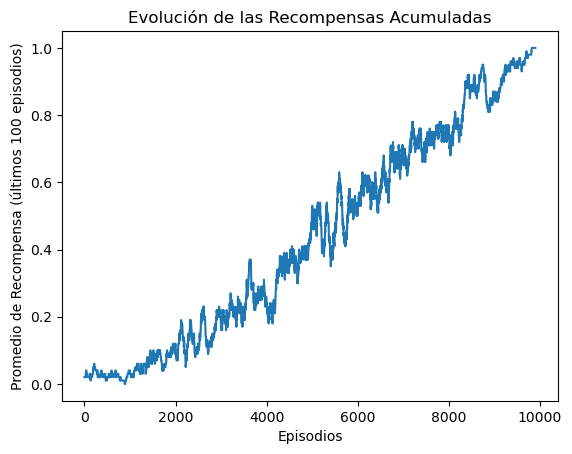

In [13]:
import matplotlib.pyplot as plt

def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w

# Calcular el promedio móvil de las recompensas
rewards_moving_avg = moving_average(episode_total_rewards, 100)

# Gráfica
plt.plot(rewards_moving_avg)
plt.title("Evolución de las Recompensas Acumuladas")
plt.xlabel("Episodios")
plt.ylabel("Promedio de Recompensa (últimos 100 episodios)")
plt.show()

<span style="color:darkblue">

La gráfica muestra la evolución de las recompensas acumuladas a lo largo de 10,000 episodios de entrenamiento de un agente utilizando el Aprendizaje-Q en el entorno 'FrozenLake-v1'. Este tipo de aprendizaje es una forma de aprendizaje por refuerzo donde un agente aprende a asignar valores (Q-values) a pares de estado-acción en un entorno, con el objetivo de maximizar la recompensa total obtenida.

La curva ascendente en la gráfica indica que el agente está aprendiendo con éxito a lo largo del tiempo. A medida que la cantidad de episodios aumenta, el promedio de las recompensas también aumenta, lo cual sugiere que el agente está mejorando en la selección de acciones que conducen a mayores recompensas.

El uso de una estrategia epsilon-greedy para la selección de acciones permite que el agente explore el entorno de manera efectiva al principio (alta probabilidad de elegir acciones aleatorias) y luego explote gradualmente su conocimiento adquirido sobre el entorno (seleccionando la acción con el mayor Q-value) a medida que epsilon se reduce.

La tasa de aprendizaje (LEARNING_RATE) y el factor de descuento (DISCOUNT) son parámetros clave en el algoritmo de Aprendizaje-Q. Una tasa de aprendizaje de 0.9 indica que el agente está poniendo un peso considerable en la nueva información aprendida, mientras que un factor de descuento de 0.9 sugiere que el agente está teniendo en cuenta las recompensas futuras significativamente, no solo las recompensas inmediatas.

In [20]:
import pandas as pd

df_q_table = pd.DataFrame(q_table, columns=["Izquierda", "Abajo", "Derecha", "Arriba"])
df_q_table

,Izquierda,Abajo,Derecha,Arriba
0,0.531441,0.59049,0.59049,0.531441
1,0.531441,0.00000,0.65610,0.590490
2,0.590490,0.72900,0.59049,0.656100
3,0.656100,0.00000,0.59049,0.590490
4,0.590490,0.65610,0.00000,0.531441
5,0.000000,0.00000,0.00000,0.000000
6,0.000000,0.81000,0.00000,0.656100
7,0.000000,0.00000,0.00000,0.000000
8,0.656100,0.00000,0.72900,0.590490
9,0.656100,0.81000,0.81000,0.000000


<span style="color:darkblue">

El `df_q_table` es una representación numérica de lo que el agente ha aprendido durante el entrenamiento sobre el entorno 'FrozenLake-v1'. Cada fila de la tabla corresponde a un estado del entorno y cada columna a una acción posible en ese estado. Los valores en la tabla (Q-values) representan la utilidad esperada de realizar una determinada acción en un determinado estado, con el fin de maximizar la recompensa total a largo plazo.

Si un estado tiene una acción con un valor Q significativamente más alto que las otras, esto indica que el agente está muy seguro de que esa acción es la mejor opción en ese estado. En cambio, si los valores Q son similares, el agente tiene menos certeza y podría beneficiarse de una exploración adicional en ese estado.

* **Ceros (0):** Un valor de 0 sugiere que el agente no ha aprendido ninguna utilidad para esa combinación de estado-acción o que la acción nunca se ha tomado en ese estado. También puede indicar que el estado es terminal (como el final del juego o un agujero), por lo que no hay recompensa futura posible desde ese estado y, por lo tanto, todas las acciones tienen un valor Q de 0.

* **Valores No-Cero:** Los valores incrementan a medida que se acercan a la fila 15, lo cual es de esperar, ya que los estados más cercanos al objetivo final (generalmente en la esquina inferior derecha del entorno) tendrían mayores valores Q asociados, ya que están más cerca de la recompensa final.

* **La fila 15:** La fila 15 tiene el valor más alto (1) en la columna correspondiente a la acción que llevaría al agente a la posición ganadora. Esto es porque llegar al objetivo resulta en la recompensa máxima y es el objetivo final del juego.

* **Distribución de Valores:** La distribución de los valores Q refleja el aprendizaje del agente sobre el entorno y su estructura de recompensas. El agente aprende a anticipar la recompensa futura basada en su experiencia, actualizando los valores Q con la ecuación de Bellman, como se implementó en la función update_q_table.

In [22]:

video_path = "videos/rl-video-episode-9999.mp4" 
video_clip = VideoFileClip(video_path)
video_clip.ipython_display()



Moviepy - Building video __temp__.mp4.
Moviepy - Writing video __temp__.mp4



Moviepy - Done !
Moviepy - video ready __temp__.mp4


<span style="color:darkblue">

Podemos ver en el video cómo el agente ejecuta la tabla de forma correcta hasta el valor 1 de la linea 15 que es la meta.

Diferencias y principales entre el Aprendizaje Q y las redes Q profundas (***Deep Q-network***, DQN ).

* ¿Qué ventajas supone una técnica respecto a la otra?
* ¿Cómo soluciona DQN los problemas que puede presentar el uso de una función aproximadora y redes neuronales?
* ¿Crees que sería necesario utilizar DQN en el problema que hemos tratado en esta actividad?

<span style="color:darkblue">

El **Aprendizaje Q** es un algoritmo de aprendizaje por refuerzo que utiliza una tabla Q para almacenar y actualizar los valores Q para cada par estado-acción.  Las **redes Q profundas (DQN)** utilizan una red neuronal para aproximar los valores Q, lo cual es especialmente útil en entornos con un gran número de estados y acciones donde una tabla Q se volvería inviablemente grande.

**Ventajas de DQN sobre Aprendizaje Q:**

* **Generalización:** Las DQN pueden generalizar y aprender en entornos con espacios de estado-acción continuos o muy grandes, donde no es práctico almacenar y actualizar una tabla Q para cada combinación posible.
* **Eficiencia de Almacenamiento:** Al no requerir una tabla para cada estado y acción, las DQN reducen significativamente la cantidad de memoria requerida.
* **Aprendizaje de Características:** Las DQN pueden aprender representaciones internas de los estados (características) que son útiles para la tarea, mientras que el Aprendizaje Q clásico no tiene esta capacidad y necesita que las representaciones de estado sean predefinidas.

**Soluciones de DQN a Problemas de Funciones Aproximadoras:**

* **Experience Replay**: Almacena transiciones pasadas y las muestrea aleatoriamente para romper la correlación entre las muestras de entrenamiento consecutivas.
* **Target Networks**: Utiliza una red neuronal separada para generar los valores Q objetivo durante las actualizaciones, lo que ayuda a estabilizar el aprendizaje.

**¿Es necesario usar DQN en el problema tratado?**

Las DQN son más adecuadas para problemas más complejos con espacios de estado y acción de alta dimensionalidad o continuos. El Aprendizaje Q es suficiente para manejar este tipo de problema y puede ser incluso preferible debido a su simplicidad y facilidad de implementación. 

--- 

### Referencias:

* https://gitlab.uoclabs.uoc.es/aprenentatge_automatic/aprenentatge_automatic/-/tree/master/6_reinforcement_learning
* https://openaccess.uoc.edu/bitstream/10609/119086/6/abuedorTFM0620memoria.pdf
* https://blog.damavis.com/aprendizaje-por-refuerzo-profundo-dqn/
* https://ichi.pro/es/aprendizaje-por-refuerzo-q-learning-profundo-con-juegos-de-atari-109904524492977 
* https://www.freecodecamp.org/espanol/news/introduccion-a-q-learning-aprendizaje-por-refuerzo/
* https://www.mql5.com/es/articles/11369
  